# Classification

## Team Name
>### Sigma  

## Team Member
>### 조현윤, 이상협, 정하연  

## Objective
> ### in search of better methods of using this behavioral data to predict which individuals they should approach—and even when and how to approach them.
> ### to create a classification algorithm that accurately identifies which customers have the most potential business value for Red Hat based on their characteristics and activities.
> ### to predict the potential business value of a person who has performed a specific activity.

## Evaluation
> ### valuated on area under the ROC curve between the predicted and the observed outcome.

## Submission File
> ### For each activity_id in the test set, you must predict a probability for the 'outcome' variable, represented by a number between 0 and 1.
~~~~
activity_id,outcome
act1_1,0
act1_100006,0
act1_100050,0
~~~~

## Data
> ### uses two separate data files that may be joined together to create a single, unified data table: a people file and an activity file.
> ### The people file contains all of the unique people (and the corresponding characteristics) that have performed activities over time. Each row in the people file represents a unique person. Each person has a unique people_id.
> ### The activity file contains all of the unique activities (and the corresponding activity characteristics) that each person has performed over time. Each row in the activity file represents a unique activity performed by a person on a certain date. Each activity has a unique activity_id.
> ### The activity file contains several different categories of activities. 
>> Type 1 activities are different from type 2-7 activities because there are more known characteristics associated with type 1 activities (nine in total) than type 2-7 activities (which have only one associated characteristic).
> ### To develop a predictive model with this data, you will likely need to join the files together into a single data set. The two files can be joined together using person_id as the common key. All variables are categorical, with the exception of 'char_38' in the people file, which is a continuous numerical variable.

## Reference 
[kaggel Predicting Red Hat Business Value](https://www.kaggle.com/c/predicting-red-hat-business-value)

### Load Python Package

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from datetime import date
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats.stattools as stools
import scipy as sp
%matplotlib inline

## Exploratory Data Analysis (EDA )¶

## Load Data Set

In [1]:
# activity data set
act_Train = pd.read_csv('./data/act_train.csv')
act_Test = pd.read_csv('./data/act_test.csv')
# people data set
people = pd.read_csv('./data/people.csv')

## Split people data set wether train data set or test data set

In [3]:
idx_train =list(act_Train['people_id'].value_counts().index)
idx_test =list(act_Test['people_id'].value_counts().index)

In [4]:
train_people = people.loc[people['people_id'].isin(idx_train)]
test_people = people.loc[people['people_id'].isin(idx_test)]

In [5]:
train_people.to_csv('./data/act_train_people.csv',index=False)
test_people.to_csv('./data/act_test_people.csv',index=False)

In [6]:
peoples = act_Train['people_id']
print('Number of active people: {}'.format(peoples.nunique()))

Number of active people: 151295


/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


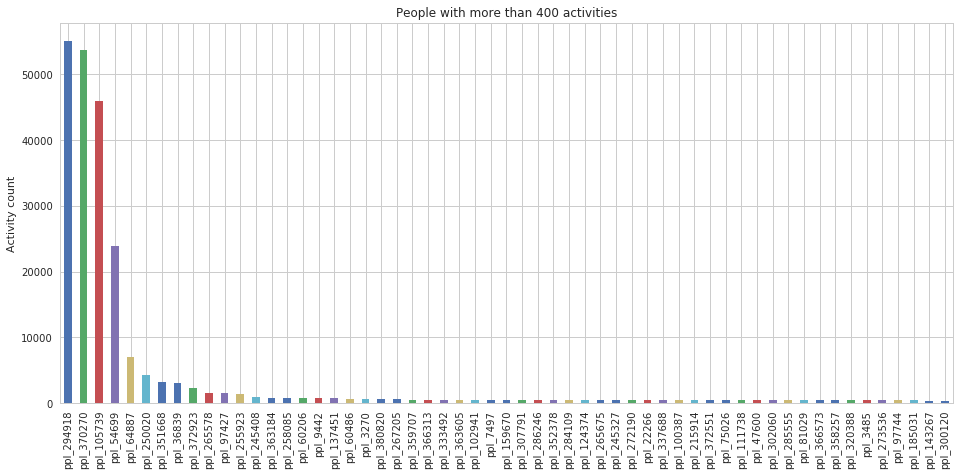

In [7]:
threshold = 400
people_counts = peoples.value_counts()
people_counts[people_counts > threshold].plot(kind='bar')
plt.title('People with more than {} activities'.format(threshold))
plt.ylabel('Activity count')
fig = plt.gcf()
fig.set_size_inches(16, 7)

/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


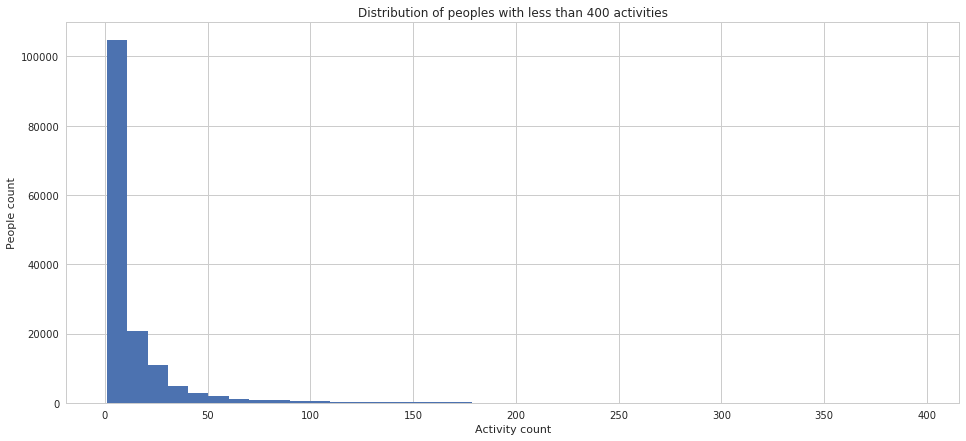

In [8]:
people_counts[people_counts <= threshold].hist(bins=int(threshold / 10))
plt.xlabel('Activity count')
plt.ylabel('People count')
plt.title('Distribution of peoples with less than {} activities'.format(threshold))
fig = plt.gcf()
fig.set_size_inches(16, 7)

In [16]:
dfx = act_Train.groupby(['people_id','outcome']).size().unstack()
dfx = dfx.fillna(0).astype(int)

In [17]:
dfx[(dfx[0]==0) & (dfx[1]!=0)]

outcome,0,1
people_id,,
ppl_100002,0,2
ppl_100003,0,34
ppl_100006,0,3
ppl_100013,0,5
ppl_100019,0,2
ppl_100035,0,54
ppl_100040,0,4
ppl_100043,0,1
ppl_100049,0,9


In [18]:
dfx[(dfx[0]!=0) & (dfx[1]==0)]

outcome,0,1
people_id,,
ppl_100,6,0
ppl_100025,46,0
ppl_100028,3,0
ppl_100029,1,0
ppl_100032,3,0
ppl_100033,19,0
ppl_100042,3,0
ppl_100045,20,0
ppl_100047,1,0


In [19]:
dfx[(dfx[0]!=0) & (dfx[1]!=0)]

outcome,0,1
people_id,,
ppl_10006,1,10
ppl_100075,57,2
ppl_100145,2,36
ppl_100297,3,13
ppl_100324,14,67
ppl_100382,3,12
ppl_100387,51,399
ppl_10041,20,4
ppl_100451,8,5


In [8]:
for people_id in idx_train[:100]:
    
    o0_count = act_Train[(act_Train['people_id'] == people_id) & (act_Train['outcome']==0)]['activity_category'].count()
    o1_count = act_Train[(act_Train['people_id'] == people_id) & (act_Train['outcome']==1)]['activity_category'].count()
    print (people_id, o0_count,o1_count)

ppl_294918 55103 0
ppl_370270 53656 12
ppl_105739 45936 0
ppl_54699 23969 0
ppl_64887 1 7051
ppl_250020 4293 0
ppl_351668 3144 0
ppl_36839 3059 0
ppl_372923 2365 0
ppl_265578 1539 0
ppl_97427 0 1487
ppl_255923 1429 0
ppl_245408 991 0
ppl_363184 825 0
ppl_258085 742 0
ppl_60206 0 736
ppl_9442 0 730
ppl_137451 711 0
ppl_60486 664 0
ppl_3270 649 0
ppl_380820 646 0
ppl_267205 566 18
ppl_359707 0 556
ppl_366313 0 555
ppl_333492 104 438
ppl_363605 533 0
ppl_102941 0 524
ppl_7497 516 5
ppl_159670 513 0
ppl_307791 76 433
ppl_286246 198 305
ppl_352378 0 501
ppl_284109 490 0
ppl_124374 485 0
ppl_265675 77 384
ppl_245327 458 2
ppl_272190 453 0
ppl_22266 0 452
ppl_337688 161 290
ppl_100387 51 399
ppl_215914 449 0
ppl_372551 448 0
ppl_75026 444 0
ppl_47600 90 353
ppl_111738 427 16
ppl_285555 434 0
ppl_302060 0 434
ppl_81029 0 427
ppl_358257 333 90
ppl_366573 423 0
ppl_320388 422 0
ppl_273536 415 0
ppl_3485 193 222
ppl_97744 411 0
ppl_185031 407 0
ppl_143267 406 0
ppl_300120 402 0
ppl_393125 396 0
p

In [119]:
pio = act_Train.groupby(['people_id','outcome'])['activity_id'].count()

In [130]:
pio.get_group('ppl_100033')

AttributeError: 'Series' object has no attribute 'get_group'

In [9]:
afx = act_Train[act_Train['people_id']=='ppl_317022']
afx.tail()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
1320314,ppl_317022,act2_929944,2022-09-17,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 8406,1
1320315,ppl_317022,act2_936101,2022-10-01,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
1320316,ppl_317022,act2_941292,2022-09-02,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
1320317,ppl_317022,act2_983968,2022-12-01,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
1320318,ppl_317022,act2_993869,2022-12-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [10]:
afx

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
1319960,ppl_317022,act2_1037825,2022-08-25,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
1319961,ppl_317022,act2_1037881,2023-02-09,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
1319962,ppl_317022,act2_1052641,2022-09-07,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
1319963,ppl_317022,act2_1094695,2022-11-11,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 8406,0
1319964,ppl_317022,act2_1095984,2022-11-03,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 8406,0
1319965,ppl_317022,act2_1109116,2022-09-13,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
1319966,ppl_317022,act2_1116781,2022-10-23,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
1319967,ppl_317022,act2_1124772,2023-04-05,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1832,0
1319968,ppl_317022,act2_1125750,2022-12-17,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
1319969,ppl_317022,act2_112727,2022-11-01,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [11]:
afx.groupby('activity_id')['people_id'].count()

activity_id
act2_1037825    1
act2_1037881    1
act2_1052641    1
act2_1094695    1
act2_1095984    1
act2_1109116    1
act2_1116781    1
act2_1124772    1
act2_1125750    1
act2_112727     1
act2_1134062    1
act2_117998     1
act2_1202611    1
act2_1207855    1
act2_1218971    1
act2_121936     1
act2_1223418    1
act2_123342     1
act2_1248056    1
act2_1248492    1
act2_1252211    1
act2_1268209    1
act2_1270754    1
act2_1309381    1
act2_1328138    1
act2_1333798    1
act2_1335645    1
act2_1352623    1
act2_1352789    1
act2_1369522    1
               ..
act2_659546     1
act2_662558     1
act2_676678     1
act2_681604     1
act2_684573     1
act2_696537     1
act2_721043     1
act2_722634     1
act2_74882      1
act2_748937     1
act2_754661     1
act2_756010     1
act2_800893     1
act2_802473     1
act2_808270     1
act2_833018     1
act2_844312     1
act2_864592     1
act2_867260     1
act2_875448     1
act2_892014     1
act2_899322     1
act2_904531     1
act2_905365     

In [12]:
afx.groupby('date')['activity_id'].count()

date
2022-07-17    1
2022-07-19    2
2022-07-20    3
2022-07-21    2
2022-08-03    1
2022-08-04    3
2022-08-05    4
2022-08-09    1
2022-08-10    6
2022-08-11    2
2022-08-12    1
2022-08-13    1
2022-08-19    4
2022-08-20    6
2022-08-21    3
2022-08-22    1
2022-08-23    4
2022-08-24    2
2022-08-25    6
2022-08-26    3
2022-08-27    4
2022-08-30    2
2022-08-31    4
2022-09-02    7
2022-09-03    2
2022-09-06    2
2022-09-07    5
2022-09-08    4
2022-09-10    1
2022-09-13    2
             ..
2023-01-17    2
2023-01-18    2
2023-01-19    3
2023-01-20    2
2023-01-27    2
2023-01-28    1
2023-02-01    1
2023-02-02    1
2023-02-03    1
2023-02-04    2
2023-02-07    1
2023-02-08    1
2023-02-09    1
2023-02-10    2
2023-02-11    2
2023-02-23    3
2023-02-24    3
2023-03-01    2
2023-03-02    5
2023-03-03    1
2023-03-08    3
2023-03-10    1
2023-04-05    2
2023-04-27    1
2023-05-23    1
2023-05-24    1
2023-05-25    1
2023-05-26    2
2023-06-20    1
2023-06-21    1
Name: activity_id, 

In [13]:
afx.groupby(['activity_category','outcome'])['activity_id'].count()

activity_category  outcome
type 2             0          147
                   1          101
type 3             0            7
                   1            3
type 4             0           10
                   1            9
type 5             0           42
                   1           39
type 7             0            1
Name: activity_id, dtype: int64

In [14]:
afx.groupby('date')['activity_id'].count()

date
2022-07-17    1
2022-07-19    2
2022-07-20    3
2022-07-21    2
2022-08-03    1
2022-08-04    3
2022-08-05    4
2022-08-09    1
2022-08-10    6
2022-08-11    2
2022-08-12    1
2022-08-13    1
2022-08-19    4
2022-08-20    6
2022-08-21    3
2022-08-22    1
2022-08-23    4
2022-08-24    2
2022-08-25    6
2022-08-26    3
2022-08-27    4
2022-08-30    2
2022-08-31    4
2022-09-02    7
2022-09-03    2
2022-09-06    2
2022-09-07    5
2022-09-08    4
2022-09-10    1
2022-09-13    2
             ..
2023-01-17    2
2023-01-18    2
2023-01-19    3
2023-01-20    2
2023-01-27    2
2023-01-28    1
2023-02-01    1
2023-02-02    1
2023-02-03    1
2023-02-04    2
2023-02-07    1
2023-02-08    1
2023-02-09    1
2023-02-10    2
2023-02-11    2
2023-02-23    3
2023-02-24    3
2023-03-01    2
2023-03-02    5
2023-03-03    1
2023-03-08    3
2023-03-10    1
2023-04-05    2
2023-04-27    1
2023-05-23    1
2023-05-24    1
2023-05-25    1
2023-05-26    2
2023-06-20    1
2023-06-21    1
Name: activity_id, 

In [15]:
for ix in act_Train:
    print (ix, sum(act_Train[ix].isnull()))

people_id 0
activity_id 0
date 0
activity_category 0
char_1 2039676
char_2 2039676
char_3 2039676
char_4 2039676
char_5 2039676
char_6 2039676
char_7 2039676
char_8 2039676
char_9 2039676
char_10 157615
outcome 0


In [16]:
act_null_chr10 = act_Train[act_Train['char_10'].isnull()]

In [17]:
act_null_chr10

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
52,ppl_100025,act1_9923,2022-11-25,type 1,type 3,type 5,type 1,type 1,type 6,type 3,type 3,type 6,type 8,NaN,0
105,ppl_100033,act1_198174,2022-07-26,type 1,type 36,type 11,type 5,type 1,type 6,type 1,type 1,type 4,type 1,NaN,0
106,ppl_100033,act1_214090,2023-06-15,type 1,type 24,type 6,type 6,type 3,type 1,type 3,type 4,type 5,type 1,NaN,0
107,ppl_100033,act1_230588,2023-02-28,type 1,type 2,type 2,type 3,type 3,type 5,type 2,type 2,type 4,type 2,NaN,0
108,ppl_100033,act1_271874,2022-07-26,type 1,type 2,type 5,type 3,type 2,type 6,type 1,type 1,type 6,type 8,NaN,0
124,ppl_100035,act1_104259,2023-07-28,type 1,type 5,type 2,type 7,type 3,type 1,type 3,type 5,type 4,type 7,NaN,1
125,ppl_100035,act1_188526,2023-02-03,type 1,type 5,type 2,type 8,type 3,type 1,type 2,type 6,type 9,type 13,NaN,1
126,ppl_100035,act1_212220,2023-02-02,type 1,type 3,type 2,type 8,type 3,type 1,type 2,type 3,type 9,type 13,NaN,1
127,ppl_100035,act1_313621,2023-02-03,type 1,type 5,type 2,type 8,type 3,type 1,type 2,type 2,type 9,type 13,NaN,1
128,ppl_100035,act1_336085,2023-02-03,type 1,type 5,type 2,type 8,type 3,type 1,type 2,type 2,type 9,type 13,NaN,1


In [18]:
act_notnull_chr10 = act_Train[act_Train['char_10'].notnull()]
act_notnull_chr10

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
5,ppl_100,act2_898576,2023-08-04,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1727,0
6,ppl_100002,act2_1233489,2022-11-23,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
7,ppl_100002,act2_1623405,2022-11-23,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
8,ppl_100003,act2_1111598,2023-02-07,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
9,ppl_100003,act2_1177453,2023-06-28,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [45]:
X = act_Train.drop(['people_id','activity_id','date','outcome'],axis = 1)
y = act_Train['outcome']

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
for idx in X.columns:
    X[idx] = X[idx].fillna('type 0')
    X[idx] = LabelEncoder().fit_transform(X[idx])

In [48]:
X

,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,3,0,0,0,0,0,0,0,0,0,5383
1,1,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,1
5,3,0,0,0,0,0,0,0,0,0,763
6,1,0,0,0,0,0,0,0,0,0,1
7,1,0,0,0,0,0,0,0,0,0,1
8,1,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,0,0,0,0,1


In [49]:
import xgboost

In [66]:
model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=5)

In [67]:
%time
Xx = model_xgb.fit(X,y)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


In [68]:
for ix in range(len(X.columns)):
    print (X.columns[ix], Xx.feature_importances_[ix])

activity_category 0.0900398
char_1 0.0545817
char_2 0.0565737
char_3 0.0342629
char_4 0.0227092
char_5 0.0282869
char_6 0.0175299
char_7 0.0211155
char_8 0.0266932
char_9 0.0390438
char_10 0.609163


In [70]:
trainMerge = pd.merge(act_Train,people, on='people_id')
trainMerge.tail()

,people_id,activity_id,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
2197286,ppl_99994,act2_4668076,2023-06-16,type 4,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,False,True,True,True,True,95
2197287,ppl_99994,act2_4743548,2023-03-30,type 4,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,False,True,True,True,True,95
2197288,ppl_99994,act2_536973,2023-01-19,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,False,True,True,True,True,95
2197289,ppl_99994,act2_688656,2023-05-02,type 4,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,False,True,True,True,True,95
2197290,ppl_99994,act2_715089,2023-06-15,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,False,True,True,True,True,95


In [71]:
trainMerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197291 entries, 0 to 2197290
Data columns (total 55 columns):
people_id            object
activity_id          object
date_x               object
activity_category    object
char_1_x             object
char_2_x             object
char_3_x             object
char_4_x             object
char_5_x             object
char_6_x             object
char_7_x             object
char_8_x             object
char_9_x             object
char_10_x            object
outcome              int64
char_1_y             object
group_1              object
char_2_y             object
date_y               object
char_3_y             object
char_4_y             object
char_5_y             object
char_6_y             object
char_7_y             object
char_8_y             object
char_9_y             object
char_10_y            bool
char_11              bool
char_12              bool
char_13              bool
char_14              bool
char_15              bool
char

In [74]:
trainMerge[trainMerge['date_x'] ==trainMerge['date_y']].groupby('outcome').count()

,people_id,activity_id,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
outcome,,,,,,,,,,,,,,,,,,,,,
0,83034,83034,83034,83034,31196,31196,31196,31196,31196,31196,...,83034,83034,83034,83034,83034,83034,83034,83034,83034,83034
1,49239,49239,49239,49239,16178,16178,16178,16178,16178,16178,...,49239,49239,49239,49239,49239,49239,49239,49239,49239,49239


In [77]:
for idx in trainMerge.columns:
    if 'type 0' in list(trainMerge[idx].unique()):
        print (idx, 'type 0 ')
    else:pass

In [78]:
X = trainMerge.drop(['people_id','activity_id','date_x','date_y','outcome'],axis = 1)
y = trainMerge['outcome']

In [79]:
for idx in X.columns:
    X[idx] = X[idx].fillna('type 0')
    X[idx] = LabelEncoder().fit_transform(X[idx])

In [80]:
import xgboost

In [81]:
model_xgb = xgboost.XGBClassifier(n_estimators=50, max_depth=2)
%time
Xx = model_xgb.fit(X,y)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


In [82]:
for ix in range(len(X.columns)):
    print (X.columns[ix], Xx.feature_importances_[ix])

activity_category 0.0
char_1_x 0.0
char_2_x 0.0
char_3_x 0.0
char_4_x 0.0
char_5_x 0.0
char_6_x 0.0
char_7_x 0.0
char_8_x 0.0
char_9_x 0.0
char_10_x 0.0
char_1_y 0.04
group_1 0.273333
char_2_y 0.14
char_3_y 0.00666667
char_4_y 0.0
char_5_y 0.0
char_6_y 0.12
char_7_y 0.0666667
char_8_y 0.0
char_9_y 0.00666667
char_10_y 0.0
char_11 0.0
char_12 0.0
char_13 0.0
char_14 0.0
char_15 0.0
char_16 0.0
char_17 0.0
char_18 0.0
char_19 0.0
char_20 0.0
char_21 0.0
char_22 0.0
char_23 0.0
char_24 0.0
char_25 0.0
char_26 0.0
char_27 0.0
char_28 0.0
char_29 0.00666667
char_30 0.0
char_31 0.0
char_32 0.0
char_33 0.0
char_34 0.0
char_35 0.0
char_36 0.00666667
char_37 0.0
char_38 0.333333


In [89]:
from sklearn.cluster import KMeans
dfX = people.copy()

In [91]:
for idx in dfX.columns:
    dfX[idx] = dfX[idx].fillna('type 0')
    dfX[idx] = LabelEncoder().fit_transform(dfX[idx])

In [111]:
people.groupby('group_1')['people_id'].count()

group_1
group 1         1
group 10        1
group 100       3
group 1000     51
group 10001     1
group 10002     1
group 10003     1
group 10004     8
group 10005     1
group 10006     1
group 10008    12
group 1001     56
group 10011     1
group 10012     6
group 10013     1
group 10016     1
group 10018     1
group 10019     2
group 1002      1
group 10020     1
group 10021     1
group 10022     1
group 10023     1
group 10025    62
group 1003      4
group 10030     1
group 10032     4
group 10033     1
group 10036     1
group 10037     1
               ..
group 9961      1
group 9962      3
group 9963      3
group 9964      1
group 9965      1
group 9967      1
group 9968      4
group 9969      2
group 997      18
group 9970     10
group 9973      2
group 9974      4
group 9976      1
group 9977      7
group 9978      2
group 998       2
group 9980      5
group 9981      1
group 9982      1
group 9984      2
group 9985      4
group 9986      1
group 9987      1
group 9988      1
gr

In [110]:
for num in range(100,251):
    kmModel = KMeans(n_clusters=num, init='random',n_init=5, max_iter=10).fit(dfX)
    print (num, kmModel.score(dfX))

100 -1.661200389e+12
101 -1.58245920175e+12
102 -1.51372978159e+12


KeyboardInterrupt: 

In [100]:
kmModle.score(dfX)

-1794615208052.0369

In [85]:
act_Train.groupby('date')['activity_id'].count()

date
2022-07-17    1240
2022-07-18     718
2022-07-19    3734
2022-07-20    5360
2022-07-21    4611
2022-07-22    4627
2022-07-23    3826
2022-07-24     711
2022-07-25     656
2022-07-26    4374
2022-07-27    5730
2022-07-28    4430
2022-07-29    5316
2022-07-30    3497
2022-07-31     726
2022-08-01     722
2022-08-02    3608
2022-08-03    4741
2022-08-04    5854
2022-08-05    5751
2022-08-06    4193
2022-08-07     752
2022-08-08     772
2022-08-09    4346
2022-08-10    6660
2022-08-11    4810
2022-08-12    3818
2022-08-13    4971
2022-08-14     697
2022-08-15     233
              ... 
2023-08-02    3493
2023-08-03    6700
2023-08-04    8824
2023-08-05    4521
2023-08-06    1421
2023-08-07     556
2023-08-08    4205
2023-08-09    5150
2023-08-10    4008
2023-08-11    4326
2023-08-12    3987
2023-08-13     956
2023-08-14     660
2023-08-15    3078
2023-08-16    6870
2023-08-17    5696
2023-08-18    3385
2023-08-19      58
2023-08-20       9
2023-08-21      18
2023-08-22    5186
2023-08